**EDA on BanData**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan=pd.read_csv(r"C:\Users\avina\OneDrive\Documents\NareshIT\DATA SCIENCE & AI\Data files\Loan_eligibility.csv",sep = ',')
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
loan.select_dtypes(include="object").columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [3]:
loan.shape

(614, 13)

In [4]:
loan.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [5]:
loan['Education'].unique

<bound method Series.unique of 0          Graduate
1          Graduate
2          Graduate
3      Not Graduate
4          Graduate
           ...     
609        Graduate
610        Graduate
611        Graduate
612        Graduate
613        Graduate
Name: Education, Length: 614, dtype: object>

In [6]:
len(loan['Education'].unique())

2

In [7]:
loan['Education'].nunique

<bound method IndexOpsMixin.nunique of 0          Graduate
1          Graduate
2          Graduate
3      Not Graduate
4          Graduate
           ...     
609        Graduate
610        Graduate
611        Graduate
612        Graduate
613        Graduate
Name: Education, Length: 614, dtype: object>

In [8]:
count=loan[['Education']]=="Graduate"
count

,Education
0,True
1,True
2,True
3,False
4,True
...,...
609,True
610,True
611,True
612,True


In [9]:
l=loan['Education'].value_counts()
l

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [10]:
l.keys()

Index(['Graduate', 'Not Graduate'], dtype='object', name='Education')

In [11]:
l.values

array([480, 134], dtype=int64)

In [12]:
edu=loan[['Education']]
edu

,Education
0,Graduate
1,Graduate
2,Graduate
3,Not Graduate
4,Graduate
...,...
609,Graduate
610,Graduate
611,Graduate
612,Graduate


In [13]:
dep=loan[['Dependents']]
dep

,Dependents
0,0
1,1
2,0
3,0
4,0
...,...
609,0
610,3+
611,1
612,2


In [14]:
edu=loan["Education"].unique()
dep=[]
for i in edu:
    con=loan["Education"]==i
    val=len(loan[con])
    dep.append(val)
    print(i,val)

Graduate 480
Not Graduate 134


In [15]:
loan_df=pd.DataFrame(zip(edu,dep),
                     columns=['Education','Dependents'])
loan_df

,Education,Dependents
0,Graduate,480
1,Not Graduate,134


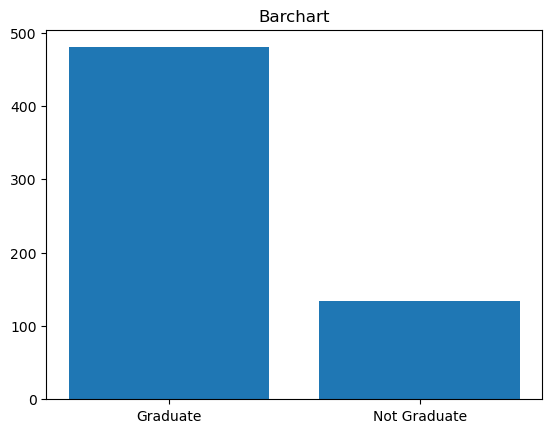

In [16]:
plt.bar('Education','Dependents',data=loan_df)
plt.title("Barchart")
plt.show()

In [17]:
l=loan['Education'].value_counts()
l.keys()

Index(['Graduate', 'Not Graduate'], dtype='object', name='Education')

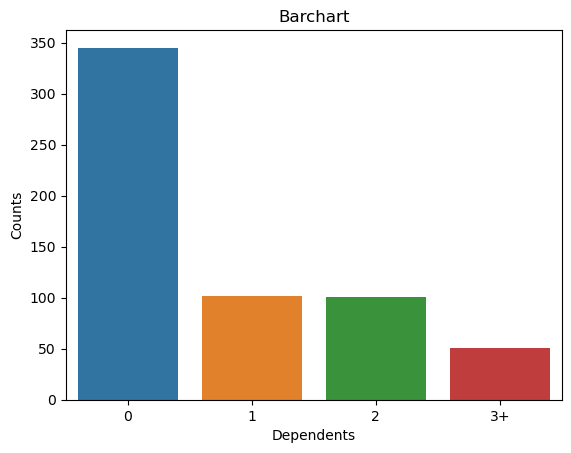

In [18]:
l=loan['Dependents'].value_counts()
keys=l.keys()
sns.countplot(data=loan,
              x="Dependents",
              order=keys)
plt.title("Barchart")
plt.xlabel("Dependents")
plt.ylabel("Counts")
plt.savefig(r"C:\Users\avina\OneDrive\Documents\NareshIT\DATA SCIENCE & AI\EDA Python\Bar-chart1.jpg")
plt.show()

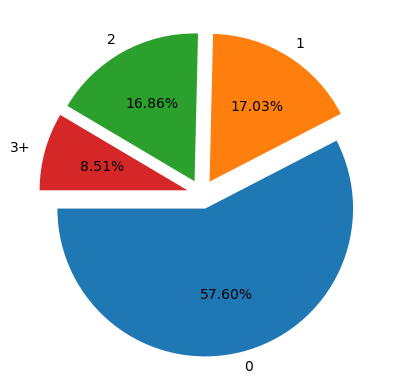

In [19]:
l=loan['Dependents'].value_counts()
keys=l.keys()
values=l.values
plt.pie(values,
        explode=[0.1,0.1,0.1,0.1],
        labels=keys,
        autopct="%0.2f%%",
        startangle=180,
        radius=1)
plt.show()

In [20]:
l1= loan[['ApplicantIncome']].value_counts()
pd.DataFrame(l1)

,count
ApplicantIncome,
2500,9
4583,6
6000,6
2600,6
5000,5
...,...
3250,1
3246,1
3244,1


In [21]:
loan['ApplicantIncome'].mean()

5403.459283387622

In [22]:
loan['ApplicantIncome'].std()

6109.041673387174

In [23]:
loan['ApplicantIncome'].median()

3812.5

In [24]:
max(loan['ApplicantIncome'])

81000

In [25]:
min(loan['ApplicantIncome'])

150

In [26]:
income_count=len(loan[['ApplicantIncome']])
income_min=loan['ApplicantIncome'].min()
income_max=loan['ApplicantIncome'].max()
income_mean=loan['ApplicantIncome'].mean()
income_std=loan['ApplicantIncome'].std()
income_median=loan['ApplicantIncome'].median()

In [27]:
income_count=round(len(loan[['ApplicantIncome']]),2)
income_min=round(loan['ApplicantIncome'].min(),2)
income_max=round(loan['ApplicantIncome'].max(),2)
income_mean=round(loan['ApplicantIncome'].mean(),2)
income_std=round(loan['ApplicantIncome'].std(),2)
income_median=round(loan['ApplicantIncome'].median(),2)

In [28]:
index_val=['count','min','max','mean','std','median']
list_values=[income_count,income_min,income_max,income_mean,income_std,income_median]
pd.DataFrame(list_values,
             columns=['ApplicantIncome'],
             index=index_val)

,ApplicantIncome
count,614.00
min,150.00
max,81000.00
mean,5403.46
std,6109.04
median,3812.50


(array([533.,  59.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <BarContainer object of 10 artists>)

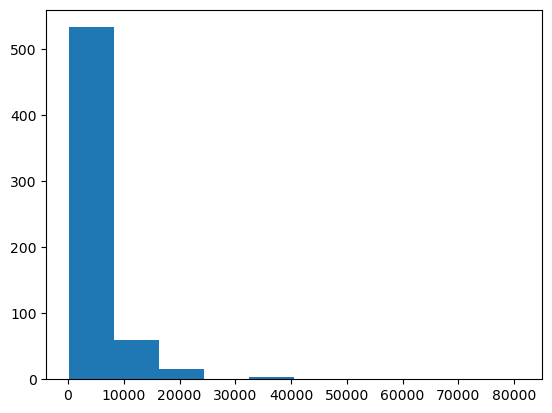

In [29]:
import matplotlib.pyplot as plt
plt.hist(loan['ApplicantIncome'])
#plt.show()

In [30]:
150.,  8235.

(150.0, 8235.0)

In [31]:
con1=loan['ApplicantIncome']>150.0
con2=loan['ApplicantIncome']<8235.0
len(loan[con1&con2])

532

In [32]:
a=loan.describe()
round(a,2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,592.00,600.00,564.00
mean,5403.46,1621.25,146.41,342.00,0.84
std,6109.04,2926.25,85.59,65.12,0.36
min,150.00,0.00,9.00,12.00,0.00
25%,2877.50,0.00,100.00,360.00,1.00
50%,3812.50,1188.50,128.00,360.00,1.00
75%,5795.00,2297.25,168.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00


(array([ 72., 310., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

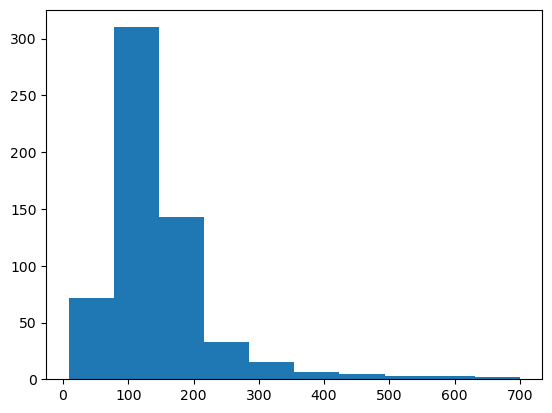

In [33]:
plt.hist(loan['LoanAmount'])

In [34]:
con1=loan['LoanAmount']>9.0
con2=loan['LoanAmount']<78.10
len(loan[con1&con2])

71

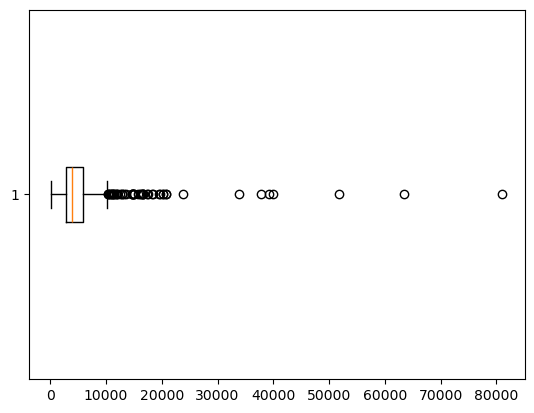

In [35]:
plt.boxplot(loan['ApplicantIncome'],vert=False)
plt.show()

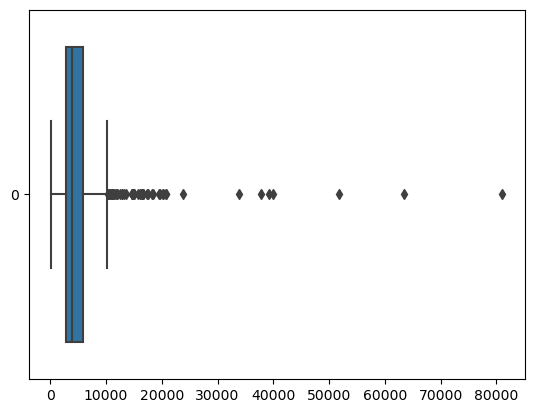

In [68]:
sns.boxplot(loan['ApplicantIncome'],
            orient='h')
plt.show()

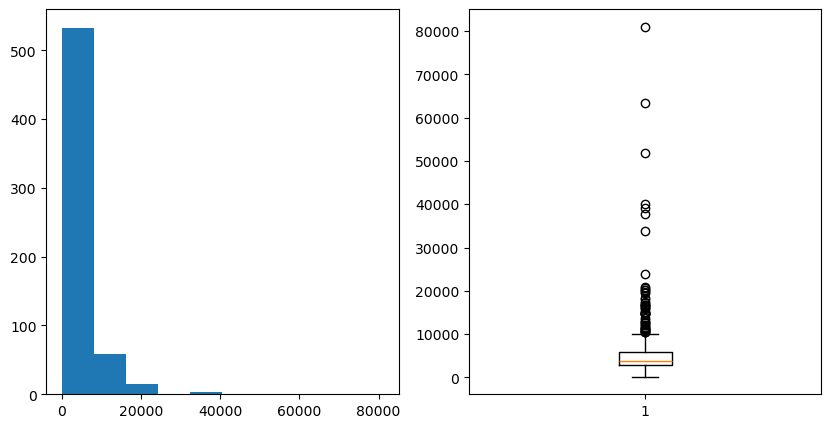

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1).hist(loan['ApplicantIncome'])
plt.subplot(1,2,2).boxplot(loan['ApplicantIncome'])
plt.show()                     
                        

In [37]:
Q1=round(np.percentile(loan['ApplicantIncome'],25),2)
Q3=round(np.percentile(loan['ApplicantIncome'],75),2)
print(f"Q1 of 25% is:{Q1}")
print(f"Q2 of 75% is:{Q3}")

Q1 of 25% is:2877.5
Q2 of 75% is:5795.0


In [38]:
IQR=Q3-Q1
IQR

2917.5

In [39]:
LB=Q1-1.5*IQR
LB

-1498.75

In [40]:
UB=Q3+1.5*IQR
UB

10171.25

In [42]:
len(loan['ApplicantIncome'])

614

**outlier**

In [43]:
con1=loan['ApplicantIncome']>LB
con2=loan['ApplicantIncome']<UB
len(loan[con1&con2])

564

**non_outlier**

In [44]:
con1=loan['ApplicantIncome']<LB
con2=loan['ApplicantIncome']>UB
non_outlier=loan[con1|con2]
len(non_outlier)

50

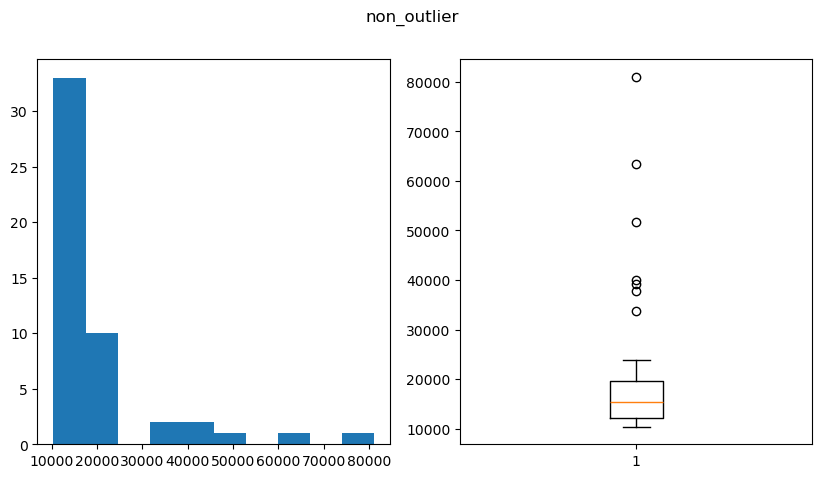

In [45]:
plt.figure(figsize=(10,5))
plt.suptitle("non_outlier")
plt.subplot(1,2,1).hist(non_outlier['ApplicantIncome'])
plt.subplot(1,2,2).boxplot(non_outlier['ApplicantIncome'])
plt.show()

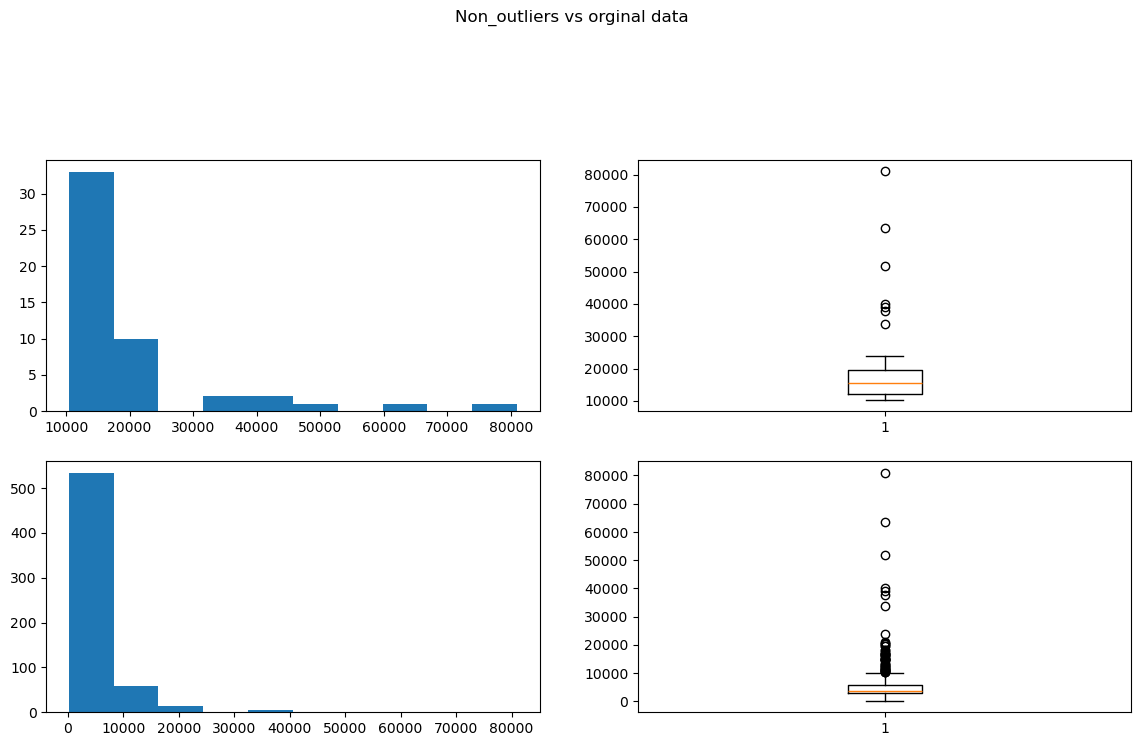

In [46]:
plt.figure(figsize=(14,15))
plt.suptitle("Non_outliers vs orginal data")
plt.subplot(4,2,1).hist(non_outlier['ApplicantIncome'])  #50
plt.subplot(4,2,2).boxplot(non_outlier['ApplicantIncome']) #50
plt.subplot(4,2,3).hist(loan['ApplicantIncome'])  #614
plt.subplot(4,2,4).boxplot(loan['ApplicantIncome']) #614
plt.show()

In [165]:
loan=pd.read_csv(r"C:\Users\avina\OneDrive\Documents\NareshIT\DATA SCIENCE & AI\Data files\Loan_eligibility.csv",sep = ',')
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [166]:
loan['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [167]:
d1={'Graduate':0,'Not Graduate':1}
d1

{'Graduate': 0, 'Not Graduate': 1}

In [168]:
loan['Education'].map(d1)

0      0
1      0
2      0
3      1
4      0
      ..
609    0
610    0
611    0
612    0
613    0
Name: Education, Length: 614, dtype: int64

In [169]:
loan['Education']=loan['Education'].map(d1)
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,0,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,0,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,0,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,0,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [178]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
loan['Education']=Le.fit_transform(loan['Education'])
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,0,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,0,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,0,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,0,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [182]:
ln=loan.select_dtypes(include="object").columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ln:
    loan[i]=le.fit_transform(loan[i])
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [183]:
loan=pd.read_csv(r"C:\Users\avina\OneDrive\Documents\NareshIT\DATA SCIENCE & AI\Data files\Loan_eligibility.csv",sep = ',')
con=loan['Education']=="Graduate"
loan['Education']=np.where(con,0,1)
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,0,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,0,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,0,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,0,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [184]:
pd.get_dummies(loan,dtype='int')

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,...,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0,5849,0.0,NaN,360.0,1.0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,0,3000,0.0,66.0,360.0,1.0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
3,1,2583,2358.0,120.0,360.0,1.0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
4,0,6000,0.0,141.0,360.0,1.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
610,0,4106,0.0,40.0,180.0,1.0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
611,0,8072,240.0,253.0,360.0,1.0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
612,0,7583,0.0,187.0,360.0,1.0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1


In [200]:
mean=loan['LoanAmount'].mean()
median=loan['LoanAmount'].median()
std=loan['LoanAmount'].std()
Nr=loan['LoanAmount']-mean
loan['LoanAmount_z']=Nr/std
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_z
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.215127
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.939534
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.308599
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.063236
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.881114
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-1.243317
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1.245369
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.474227


In [209]:
max=loan['LoanAmount'].idxmax(),loan['LoanAmount_z'].idxmax()
min=loan['LoanAmount'].idxmin(),loan['LoanAmount_z'].idxmin()
max,min

((171, 171), (568, 568))

In [211]:
max_val=loan['LoanAmount'].max(),loan['LoanAmount_z'].max()
min_val=loan['LoanAmount'].min(),loan['LoanAmount_z'].min()
max_val,min_val

((700.0, 6.468105368560942), (9.0, -1.6055199970758796))

In [215]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
loan['LoanAmount_ss']=ss.fit_transform(loan[['LoanAmount']])

In [216]:
loan[['LoanAmount','LoanAmount_z','LoanAmount_ss']]

,LoanAmount,LoanAmount_z,LoanAmount_ss
0,NaN,NaN,NaN
1,128.0,-0.215127,-0.215309
2,66.0,-0.939534,-0.940328
3,120.0,-0.308599,-0.308860
4,141.0,-0.063236,-0.063289
...,...,...,...
609,71.0,-0.881114,-0.881859
610,40.0,-1.243317,-1.244368
611,253.0,1.245369,1.246423
612,187.0,0.474227,0.474628
